## TASCA M1T01

**Exercici 1: A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL.** 

*Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.*

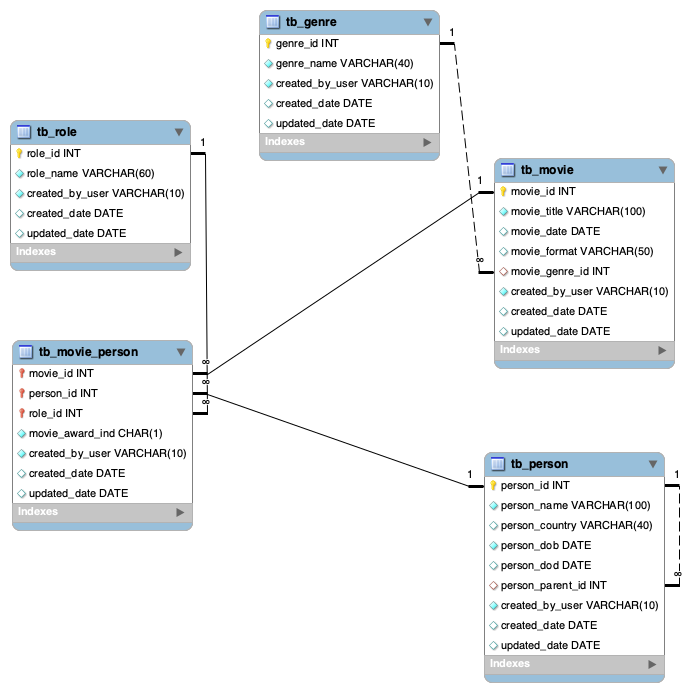

Con los documentos adjuntos, creamos la base de datos "movies", que almacena información sobre géneros de películas, detalles de las películas, roles en la industria cinematográfica y personas relacionadas con estas películas. Las tablas están relacionadas entre ellas mediante claves primarias y externas para permitir consultas. Tenemos variables de distinta naturaleza de los tipos INTEGER, VARCHAR y DATE entre otras.

El esquema creado está formado por:

1. Base de datos 'Movies': Contiene 5 tablas con información diversa de películas y personas relacionadas con el cine.

2. Tabla 'tb_genre': Almacena información sobre los géneros de las películas. 
        genre_id: Primary key
               
3. Tabla 'tb_movie':  contiene información sobre las películas.
        movie_id: Primary key
        movie_genre_id: Foreign key (relaciona con la tabla 'tb_genre')
        
4. Tabla 'tb_role': información sobre roles cinematográficos.
        role_id: Primary key
        
5. Tabla 'tb_person': con datos de personas relacionadas con el cine.
        person_id: Primary key
        person_parent_id: Foreign key (relación con tb_movie_person)
        
6. Tabla 'tb_movie_person': Relaciona películas, personas y roles.
        movie_id: Foreign key (relación con la tabla'tb_movie')
        person_id: Foreign key (relación con la tabla 'tb_person')
        role_id: Foreign key (relación con la tabla 'tb_role')
        

**Exercici 2: Realitza la següent consulta sobre la base de dades acabada de crear:**

*Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.*

SELECT person_name, person_country, person_dob FROM tb_person
WHERE person_dod IS NULL
ORDER BY person_dob ASC;

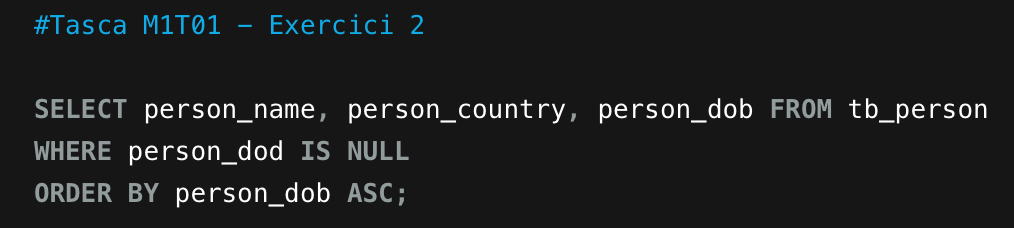

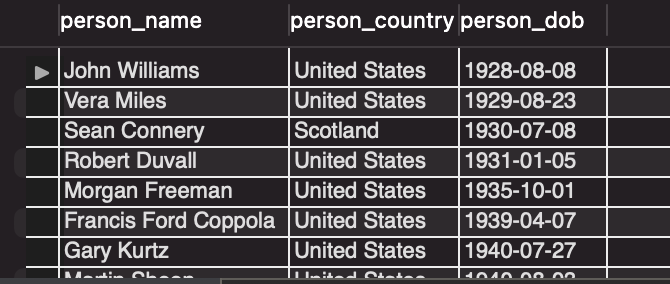

**Exercici 3: Realitza la següent consulta sobre la base de dades acabada de crear:** 

*Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.*

SELECT genre_name, COUNT(M.movie_id) AS Total_movies
FROM tb_genre AS G
JOIN tb_movie AS M
ON G.genre_id = M.movie_genre_id
GROUP BY G.genre_name
ORDER BY Total_movies DESC
;

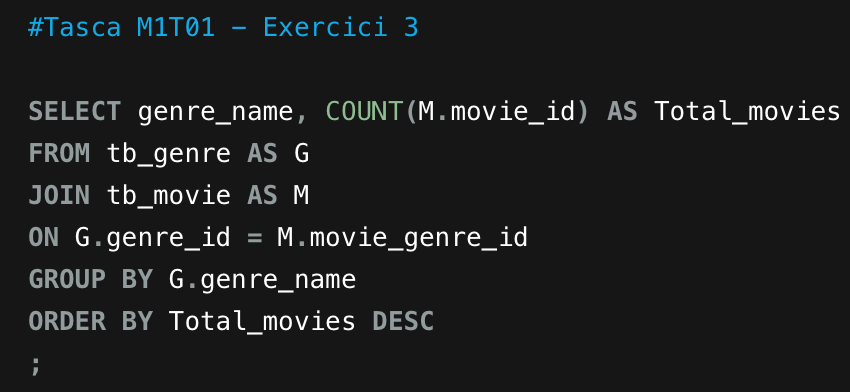

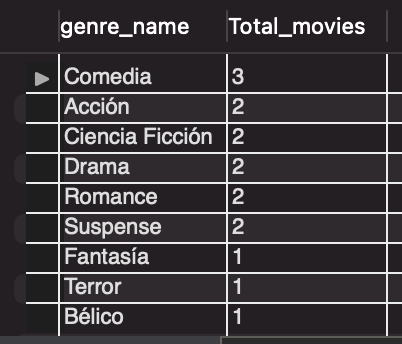

**Exercici 4: Realitza la següent consulta sobre la base de dades acabada de crear:** 

*Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula.*

*Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.*

SELECT p.person_name, MAX(r.role_count) AS max_roles
FROM movies.tb_person AS p
JOIN (
    SELECT mp.person_id, COUNT(DISTINCT mp.role_id) AS role_count
    FROM movies.tb_movie_person AS mp
    GROUP BY mp.person_id
) AS r ON p.person_id = r.person_id
GROUP BY p.person_name;

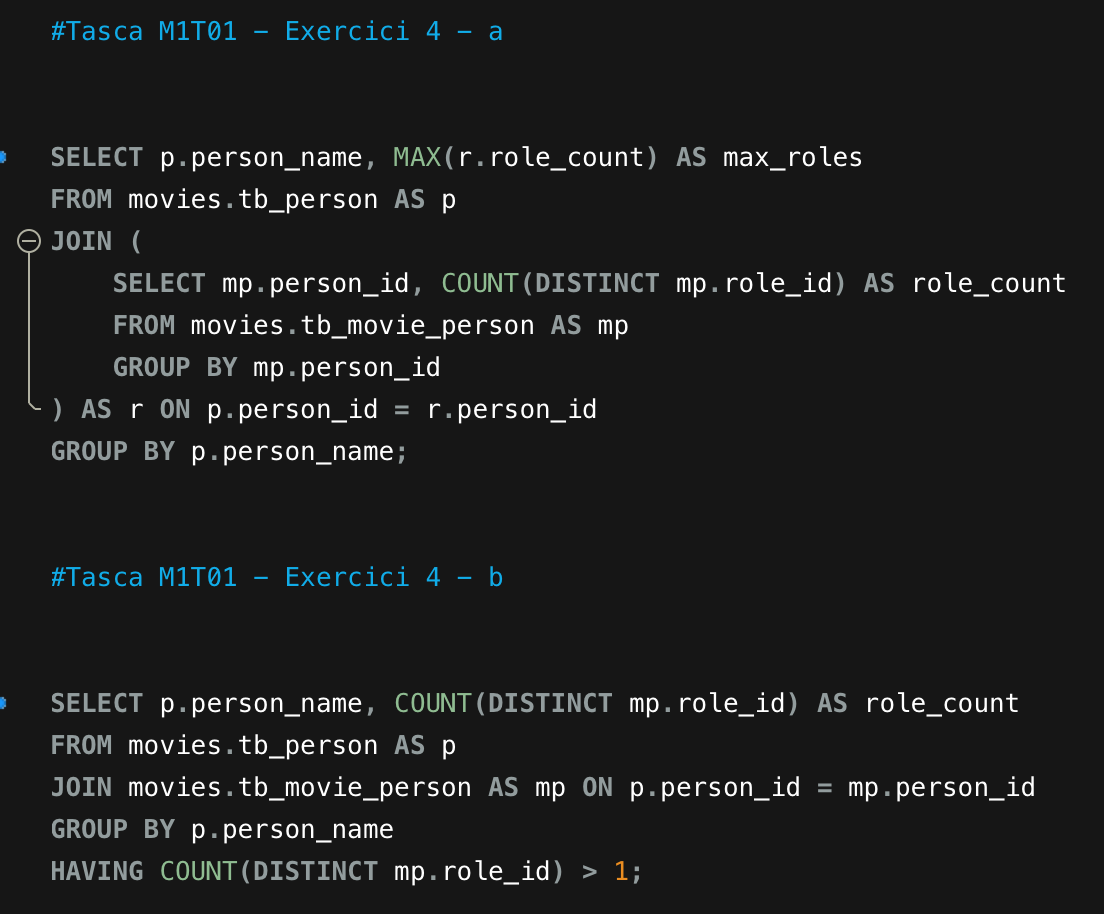

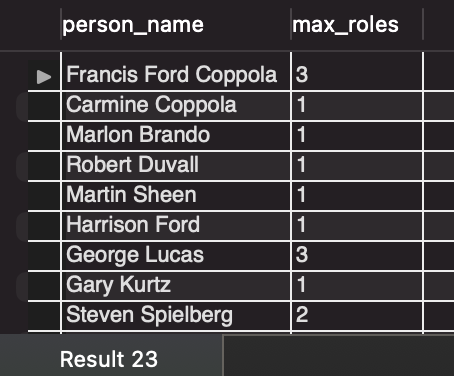

SELECT p.person_name, COUNT(DISTINCT mp.role_id) AS role_count
FROM movies.tb_person AS p
JOIN movies.tb_movie_person AS mp ON p.person_id = mp.person_id
GROUP BY p.person_name
HAVING COUNT(DISTINCT mp.role_id) > 1;

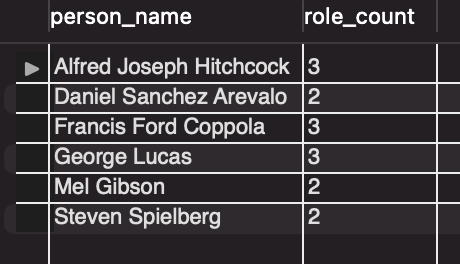

**Exercici 5: Realitza la següent operació sobre la base de dades acabada de crear:** 

*Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.*

INSERT INTO movies.tb_genre (genre_id, genre_name)
VALUES (69, 'Documental');

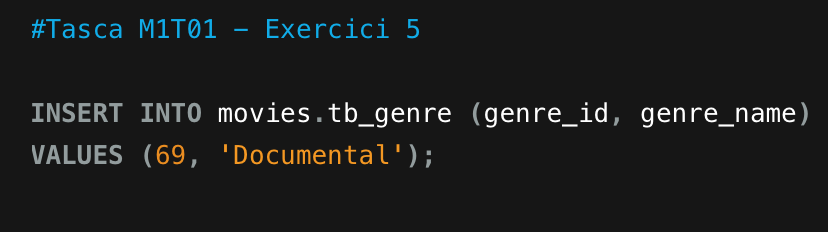

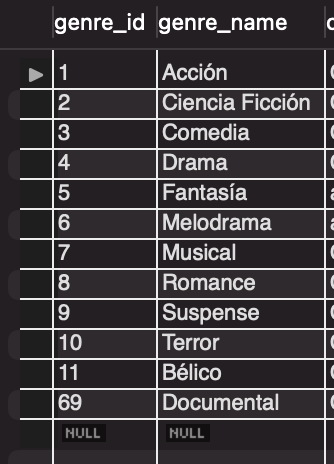

**Exercici 6: Fes la següent operació sobre la base de dades acabada de crear:**  

*Elimina la pel·lícula "La Gran Familia Española" de la base de dades.*

DELETE FROM movies.tb_movie_person
WHERE movie_id = (SELECT movie_id FROM movies.tb_movie WHERE movie_title = 'La Gran Familia Española');


DELETE FROM movies.tb_movie
WHERE movie_title = 'La Gran Familia Española';


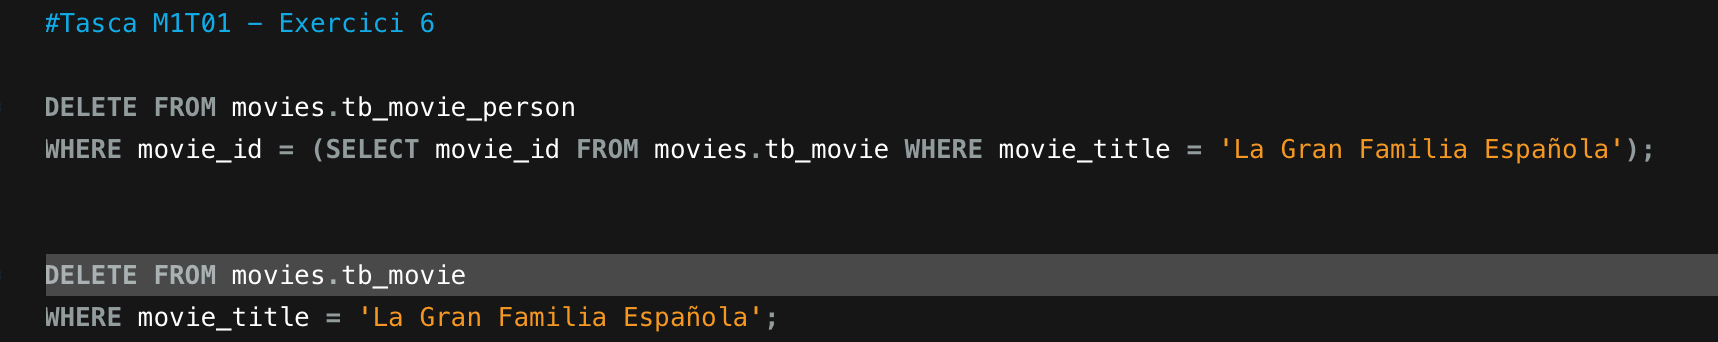

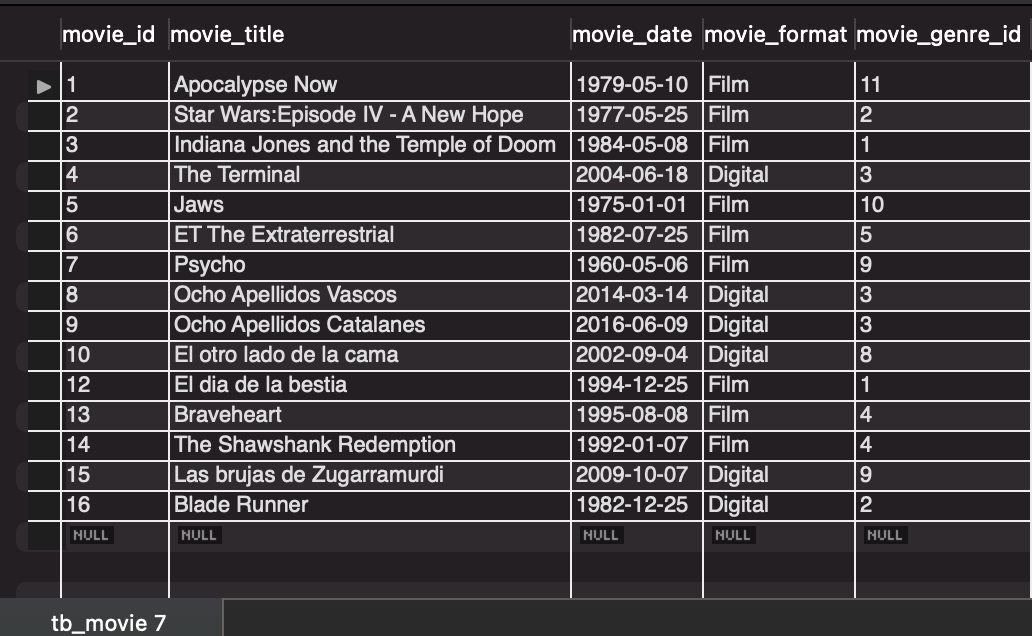

**Exercici 7: Realitza la següent operació sobre la base de dades acabada de crear:** 

*Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.*

UPDATE movies.tb_movie
SET movie_genre_id = (SELECT genre_id FROM movies.tb_genre WHERE genre_name = 'Comedia')
WHERE movie_title = 'Ocho Apellidos Catalanes';

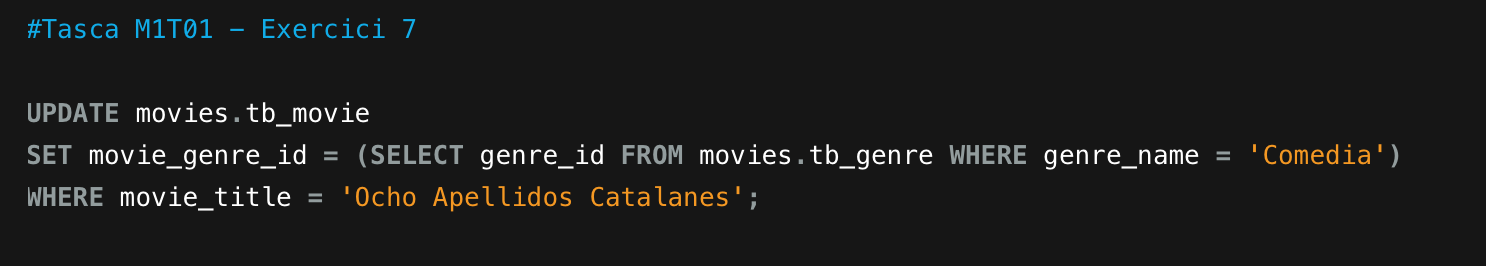

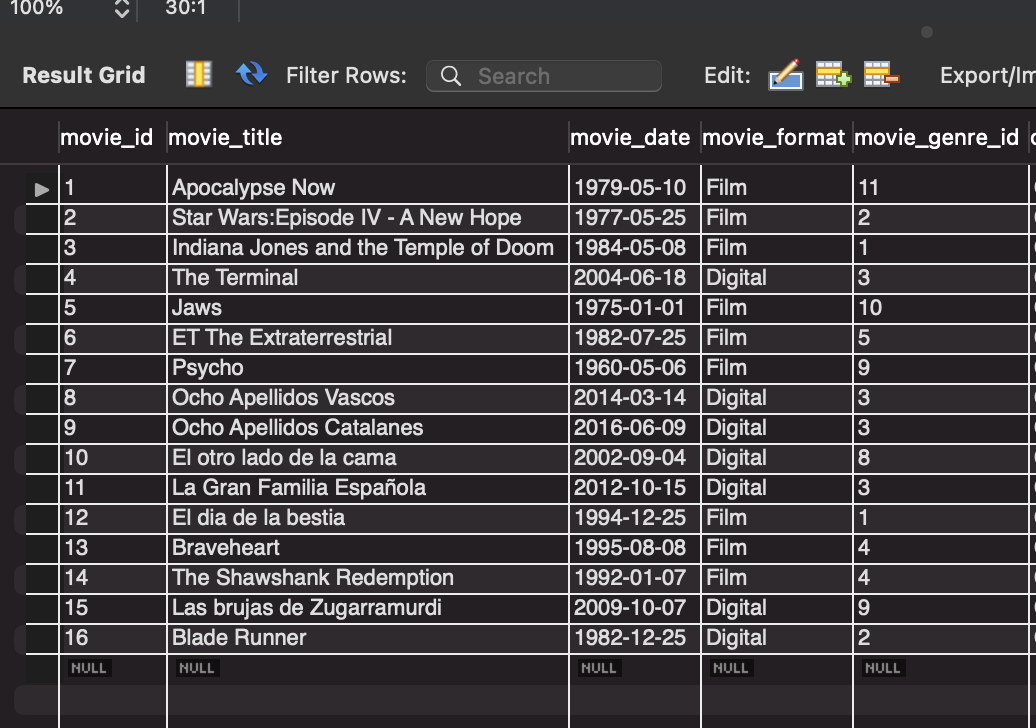